In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats import f_oneway
import os

In [2]:
brainmap = pd.read_csv("../../Derivatives/childhood/brainmap.csv")

In [3]:
ageeffect = pd.read_csv('../../Derivatives/childhood/H_gam_ageeffect_corrected.csv')
ageeffect['label'] = brainmap['scaefer7']
ageeffect = ageeffect[ageeffect.age>0]

In [4]:
derivatives = pd.read_csv('../../Derivatives/childhood/H_gam_derivative.csv')
derivatives['label'] = brainmap['scaefer7']
derivatvies = derivatives.loc[[x for x in derivatives.index if x in ageeffect[ageeffect.age>0].index.values], :]

In [5]:
derivatives = derivatives[derivatives.age>0]

F_onewayResult(statistic=1.9218776926777157, pvalue=0.09503727448309349)


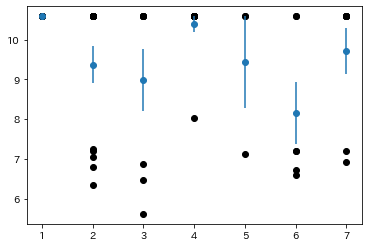

In [6]:
df = pd.DataFrame([derivatives.label, derivatives.age]).T.dropna()
df = df[df.age>0]
plt.scatter(df.label, df.age, color='k')
plt.errorbar(np.arange(1,8), df.groupby('label').mean().reset_index()['age'].values, yerr=df.groupby('label').sem().reset_index()['age'].values, fmt="o")
plt.savefig('yeonetwork.eps')
anova = f_oneway(df[df.label==1].age.values,df[df.label==2].age.values,df[df.label==3].age.values
              ,df[df.label==4].age.values,df[df.label==5].age.values,df[df.label==6].age.values,df[df.label==7].age.values)
print(anova)
plt.savefig('all_derivatives.eps')

In [7]:
derivatives = derivatives[derivatives.age<10]

F_onewayResult(statistic=2.8845500848896433, pvalue=0.07239162885113513)


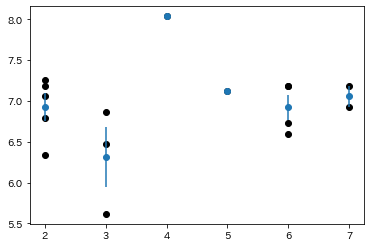

In [8]:
df = pd.DataFrame([derivatives.label, derivatives.age]).T.dropna()
df = df[df.age>0]
plt.scatter(df.label, df.age, color='k')
plt.errorbar(np.arange(2,8), df.groupby('label').mean().reset_index()['age'].values, yerr=df.groupby('label').sem().reset_index()['age'].values, fmt="o")
plt.savefig('yeonetwork.eps')
anova = f_oneway(df[df.label==2].age.values,df[df.label==3].age.values
              ,df[df.label==4].age.values,df[df.label==5].age.values,df[df.label==6].age.values,df[df.label==7].age.values)
print(anova)
plt.savefig('nonlinear_derivatives.eps')

F_onewayResult(statistic=0.14101447366473252, pvalue=0.9900834688724635)


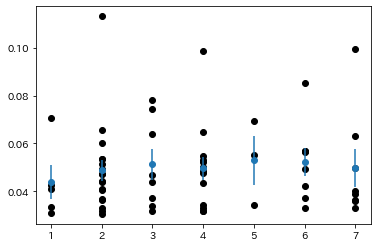

In [9]:
df = pd.DataFrame([ageeffect.label, ageeffect.age]).T.dropna()
df = df[df.age>0]
#plt.boxplot([df[df.label==1].age.values,df[df.label==2].age.values,df[df.label==3].age.values
#              ,df[df.label==4].age.values,df[df.label==5].age.values,df[df.label==6].age.values,df[df.label==7].age.values])
plt.scatter(df.label, df.age, color='k')
plt.errorbar(np.arange(1,8), df.groupby('label').mean().reset_index()['age'].values, yerr=df.groupby('label').sem().reset_index()['age'].values, fmt="o")
plt.savefig('yeonetwork.eps')
anova = f_oneway(df[df.label==1].age.values,df[df.label==2].age.values,df[df.label==3].age.values
              ,df[df.label==4].age.values,df[df.label==5].age.values,df[df.label==6].age.values,df[df.label==7].age.values)
print(anova)
plt.savefig('ageeffect.eps')